<a href="https://colab.research.google.com/github/namnguyen9363/space/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.shape
#the dataframes have 29322 rows and 3 columns

(29322, 3)

In [ ]:
df_hh_income.columns
#there are 3 column named 'Geographic Area', 'City', 'Median Income

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
#check if any NA
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna().values.any()

False

In [ ]:
#check if any duplicated
df_hh_income.duplicated().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace({'-':'0'})
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

In [ ]:


data = df_pct_poverty.groupby(['Geographic Area'],as_index=False).agg({'poverty_rate':"mean"}).sort_values(['poverty_rate'],ascending=False)

fig = px.bar(data,x='Geographic Area',y='poverty_rate',color='Geographic Area')
fig.show()



# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
#replace wrong values '(X)'
df_hh_income['Median Income']=df_hh_income['Median Income'].replace({'(X)' : '0'})
#replace wrong values '(0)'
df_hh_income['Median Income']=df_hh_income['Median Income'].replace({'(0)' : '0'})
#replace wrong values '-'
df_hh_income['Median Income']=df_hh_income['Median Income'].replace({'-' : '0'})
#replace wrong values '-'
df_hh_income['Median Income']=df_hh_income['Median Income'].replace({'2,500-' : '2500'})
#replace wrong values '250 000'
df_hh_income['Median Income']=df_hh_income['Median Income'].replace({'250,000+' : '250000'})
df_hh_income['Median Income']=df_hh_income['Median Income'].replace({'250,000' : '250000'})
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'])

data = df_hh_income.groupby(['Geographic Area'],as_index=False).agg({'Median Income':'sum'}).sort_values(['Median Income']).head(10)
fig = px.scatter(data,x='Geographic Area',y='Median Income',color='Geographic Area')
fig.show()

In [ ]:
#clean data
df_pct_completed_hs['percent_completed_hs']=df_pct_completed_hs['percent_completed_hs'].replace({'-' : '0'})





In [ ]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

In [ ]:
#group data
data = df_pct_completed_hs.groupby(['Geographic Area'],as_index=False).agg({'percent_completed_hs':'mean'}).sort_values(['percent_completed_hs'],ascending=False)
#create chart
fig = px.bar(data,x='Geographic Area',y='percent_completed_hs',color='Geographic Area')
fig.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
#data of Poverty Rate
poverty = df_pct_poverty.groupby(['Geographic Area'],as_index=False).agg({'poverty_rate':"mean"}).sort_values(['poverty_rate'],ascending=False)
poverty.head(5)

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51


In [ ]:
#data of High school Graduation Rates
hs = df_pct_completed_hs.groupby(['Geographic Area'],as_index=False).agg({'percent_completed_hs':'mean'}).sort_values(['percent_completed_hs'],ascending=False)
hs.head(5)

,Geographic Area,percent_completed_hs
19,MA,92.03
11,HI,91.67
6,CT,91.59
21,ME,91.43
30,NH,90.71


In [ ]:
#map 2 table
poverty['percent_completed_hs'] = poverty['Geographic Area'].map(hs.set_index('Geographic Area')['percent_completed_hs'])



In [ ]:
plt.figure(figsize=(20,10))
plt.plot('Geographic Area','poverty_rate',data=poverty)
plt.plot('Geographic Area','percent_completed_hs',data=poverty)
plt.xlabel("Geographic Area")
plt.ylabel("Poverty rate & percent completed High School Graduation Rates")
plt.title('Relationship between Poverty Rates and High School Graduation Rates')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
# relation ship between 2 varible

p= sns.jointplot(data=poverty, x="poverty_rate", y="percent_completed_hs",kind="kde",)
p.fig.suptitle("Relationship between Poverty Rates and High School Graduation Rates")
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

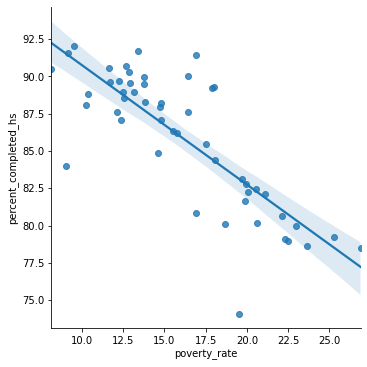

In [ ]:
sns.lmplot(data=poverty, x="poverty_rate", y="percent_completed_hs")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
#clean data
df_share_race_city = df_share_race_city.replace({'(X)' : '0'})


In [ ]:
#convert string to numeric
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'])
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'])

df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'])

df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'])

df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'])


In [ ]:
#group data
racial_state = df_share_race_city.groupby('Geographic area').agg({'share_white':'mean',
                                                   'share_black':'mean',
                                                   'share_native_american':'mean',
                                                   'share_asian':'mean',
                                                   'share_hispanic':'mean'
                                                   })
racial_state.head(3)

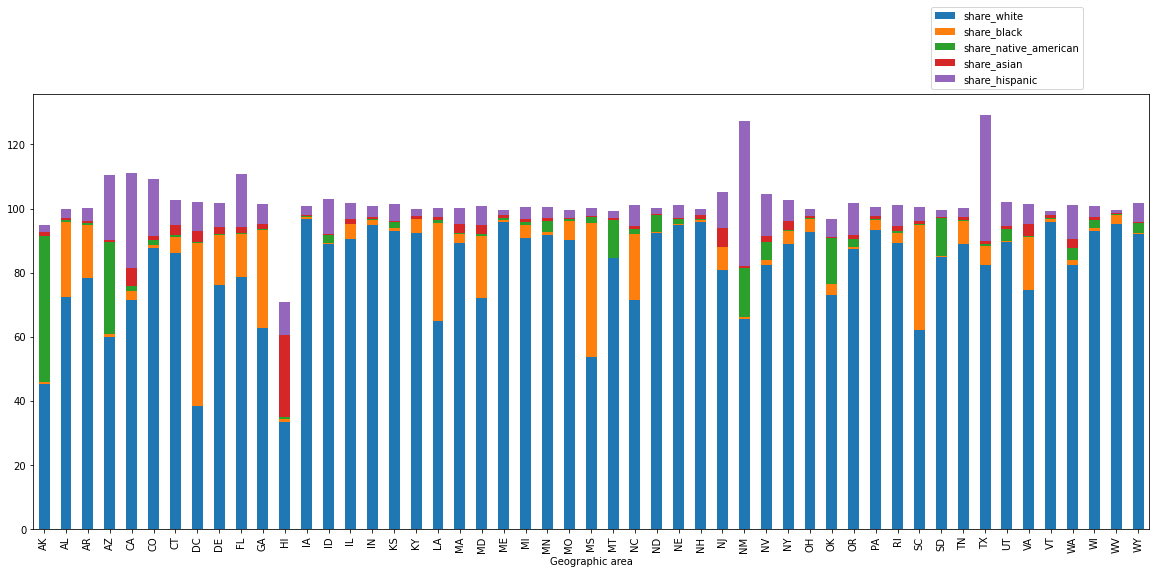

In [ ]:
#visualize data
racial_state.plot(kind="bar",stacked=True,figsize=(20,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.head(5)

Text(0.5, 1.0, 'People Killed by Race Chart')

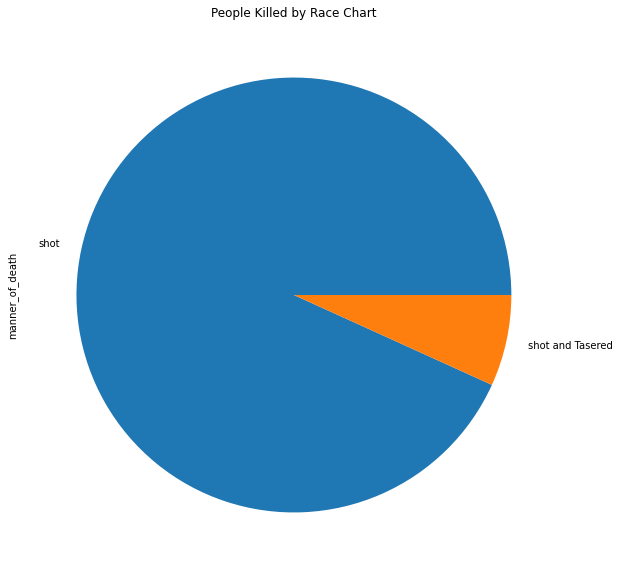

In [ ]:
data = df_fatalities['manner_of_death'].value_counts()
data.plot.pie(y=data.values, figsize=(20, 10))
plt.title('People Killed by Race Chart')

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

Text(0.5, 1.0, 'People Killed by gender')

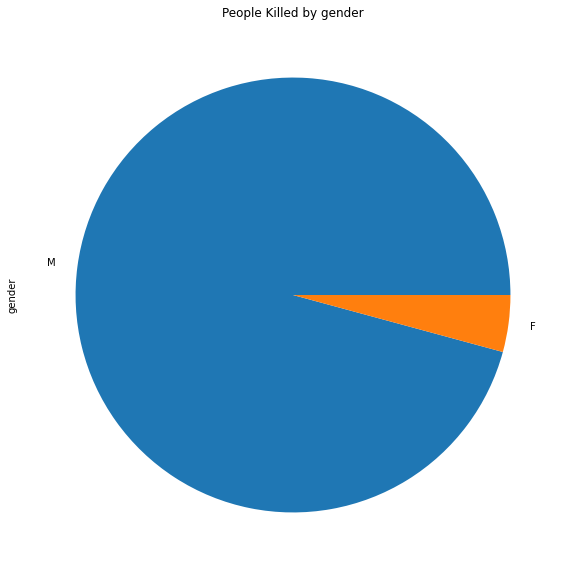

In [ ]:
data = df_fatalities['gender'].value_counts()
data.plot.pie(y=data.values, figsize=(20, 10))
plt.title('People Killed by gender')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
data = df_fatalities.groupby(['gender','manner_of_death'],as_index=False).agg({'id':'count'})
data

,gender,manner_of_death,id
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


In [ ]:
fig = px.bar(data, x= 'gender',y='id',color='manner_of_death', title='Men and women in the manner of death',labels={'id':'count'})

fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
#create data
data = df_fatalities.groupby('armed').agg({'id':'value_counts'})

data.rename(columns={'id': 'count'},inplace=True)
data = data.groupby('armed').agg({'count':'sum'})
data.reset_index()
total = data['count'].sum()
data['percent'] = data['count']/total*100
new = data.reset_index().sort_values(by='percent',ascending=False).head(10)
new

,armed,count,percent
25,gun,1398,55.34
32,knife,373,14.77
67,vehicle,177,7.01
64,unarmed,171,6.77
65,undetermined,117,4.63
63,toy weapon,104,4.12
66,unknown weapon,18,0.71
34,machete,18,0.71
0,Taser,9,0.36
2,ax,9,0.36


In [ ]:
fig = px.bar(new, x='armed',y='percent',color= 'percent', title='Men and women in the manner of death')
fig.update_layout(
    title="Percentage of police killings were people armed",
    xaxis_title="Reason",
    yaxis_title="Percent")

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities

In [ ]:
df_fatalities.replace({'nan':'0'})
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'] )

total = df_fatalities[(df_fatalities['age']<100) & (df_fatalities['age']>0)]

under_25 = df_fatalities[df_fatalities['age'] <25]
percent =  under_25['id'].count()/total['id'].count()*100
percent

21.44019528071603

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

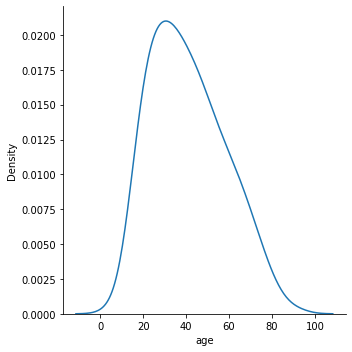

In [ ]:
data = total.groupby(['age','race']).agg({'id':'count'})
hist = data.reset_index()
sns.displot(hist, x="age", kind="kde")

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

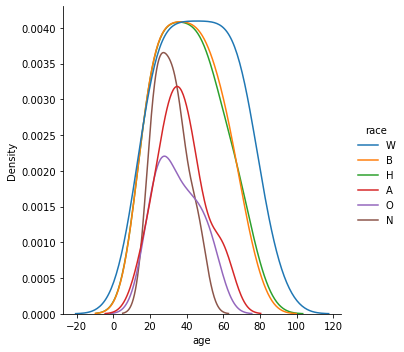

In [ ]:
data = total.groupby(['age','race']).agg({'id':'count'})
hist = data.reset_index()
sns.displot(hist, x="age", hue="race", kind="kde")


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
data = total.groupby(['race']).agg({'id':'count'})
race = data.reset_index()
race

In [ ]:
fig = px.bar(race, x='race', y = 'id', color='race')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental = df_fatalities.groupby('signs_of_mental_illness',as_index=False).agg({'count':'sum'}).reset_index()
true = mental[mental['index'] == 1]['count'].sum()
mental= mental['count'].sum()
percent = true/mental*100
percent

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
city = df_fatalities.groupby('city').agg({'count':'sum'}).sort_values(by='count',ascending=False).reset_index().head(10)

In [ ]:
fig = px.bar(city, x='city', y = 'count', color='city')
fig.show()

In [ ]:
df_fatalities

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
city = df_fatalities.groupby(['city','race']).agg({'count':'count'}).sort_values(by='count',ascending=False).reset_index().head(10)
city

In [ ]:
fig = px.bar(city, x='city', y = 'count', color='race')
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
#create count columns
df_fatalities['count'] = df_fatalities['name'].apply(lambda x:1)


In [ ]:
df_fatalities.head(4)

In [ ]:
#create table
data = df_fatalities.groupby('state',as_index=False).agg({'count':'sum'})
data

In [ ]:
#create chart
fig = px.choropleth(data,locations='state', locationmode="USA-states", color='count', scope="usa")
fig.update_layout(
    title_text = 'Choropleth Map of Police Killings by US State',
)
fig.show()

COMMENT
Shootings happen across the country
Police shootings have taken place in every state and have occurred more frequently in cities where populations are concentrated. States with the highest rates of shootings are New Mexico, Alaska and Oklahoma.

Each circle on the map below marks the location of a deadly shooting.

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [ ]:
df_fatalities['death_year'] = df_fatalities['date'].apply(lambda x: x.year)

In [ ]:
death_year = df_fatalities.groupby('death_year',as_index=False).agg({'count':'sum'})

In [ ]:
fig = px.bar(death_year,x='death_year', y = 'count',color = 'death_year',)
fig.show()